In [60]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

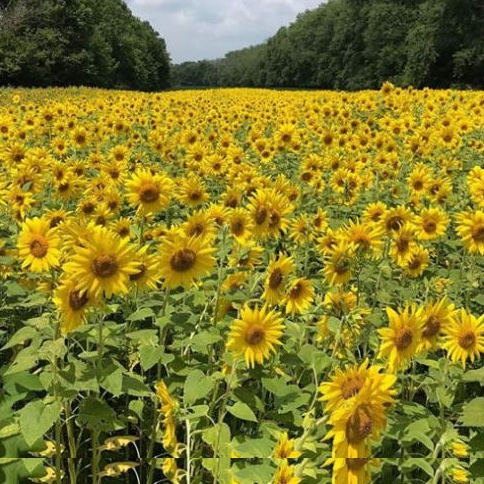

In [17]:
image = cv2.imread('sunflower.jpg')
cv2_imshow(image)

In [9]:
img_dim = image.shape
img_dim

(484, 484, 3)

In [75]:
def construct_gaussian_pyramid(image, n_levels):
  img = image
  blur_pyramid = [img]

  for i in range(n_levels - 1):
    # print('level = ', i)
    blurred_image = cv2.GaussianBlur(img, ksize = (5, 5), sigmaX = 0)
    blurred_down_img = cv2.resize(blurred_image, (0, 0), cv2.INTER_LINEAR, fx = 0.5, fy = 0.5)
    blur_pyramid.append(blurred_down_img)
    img = blur_pyramid[-1]

  return blur_pyramid

In [78]:
def construct_laplacian_pyramid(image, n_levels):
  guass_pyramid = construct_gaussian_pyramid(image, n_levels)
  lap_pyramid = []

  for idx in range(1, n_levels):
    initial_image = guass_pyramid[idx - 1]
    gauss_image = guass_pyramid[idx]
    upsampled_gauss_img = cv2.resize(gauss_image, (0, 0), cv2.INTER_LINEAR, fx = 2, fy = 2)

    #print(initial_image.shape)
    #print(upsampled_gauss_img.shape)
    laplacian_image = cv2.subtract(initial_image, upsampled_gauss_img)
    #print('Laplacian image: ', laplacian_image.shape, '\n')
    lap_pyramid.append(laplacian_image)

  lap_pyramid.append(guass_pyramid[- 1])

  return lap_pyramid


In [92]:
def resize_image_list(img_list):
  resized_img = [img_list[0]]

  for idx in range(1, len(img_list)):
    resized_img.append(cv2.resize(img_list[idx], (0, 0), cv2.INTER_LINEAR, fx = 2, fy = 2))

  return resized_img

In [96]:
def add_image_list(img_list):
  add_img = [img_list[0]]

  for idx in range(1, len(img_list)):
    prev_img = img_list[idx - 1]
    resized_img = cv2.resize(img_list[idx], (0, 0), cv2.INTER_LINEAR, fx = 2, fy = 2)

    add_img = prev_img + resized_img
    prev_img = add_img

  return add_img

In [52]:
b_pyramid = construct_gaussian_pyramid(image, 3)
for b in b_pyramid:
  print(b.shape)

level =  0
level =  1
level =  2
(484, 484, 3)
(242, 242, 3)
(121, 121, 3)
(60, 60, 3)


In [79]:
laplacian_pyramid = construct_laplacian_pyramid(image, 3)
for l in laplacian_pyramid:
  print(l.shape)

(484, 484, 3)
(242, 242, 3)
(121, 121, 3)


In [80]:
len(laplacian_pyramid)

3

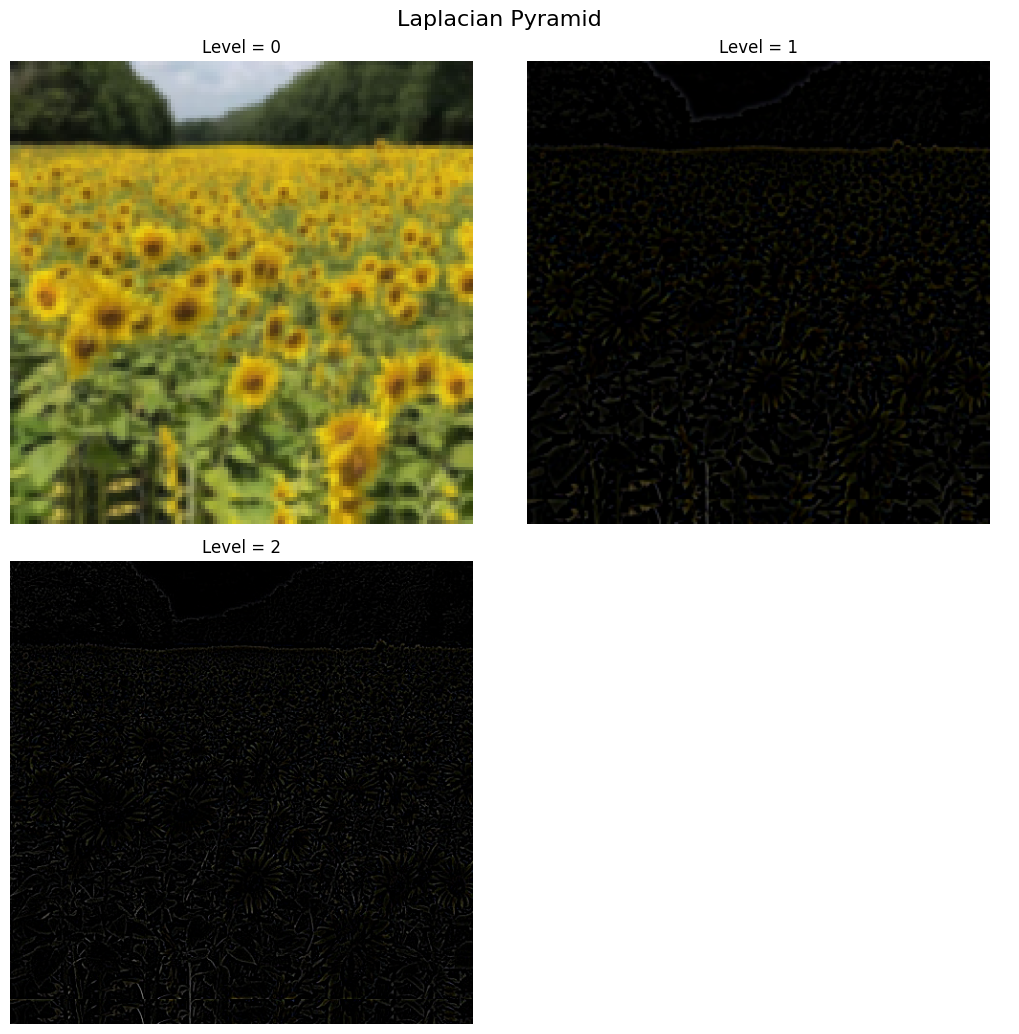

In [84]:
num_components = len(laplacian_pyramid)

fig, axes = plt.subplots(2, 2, figsize=(10.5, 10.5))
k = num_components - 1
n_rows = num_components // 2 + 1

for r in range(n_rows):
  for c in range(2):
    if r == (n_rows - 1) and c != 0:
      axes[r, c].axis('off')
      break
    else:
      img = laplacian_pyramid[k]
      img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      axes[r, c].imshow(img_rgb)
      title_text = f'Level = {num_components - k -1}'
      axes[r, c].set_title(title_text)
      axes[r, c].axis('off')
      k -= 1

plt.suptitle('Laplacian Pyramid', fontsize=16)
plt.tight_layout()
plt.axis('off')
plt.show()

In [93]:
resized_lap = resize_image_list(laplacian_pyramid)

for l in resized_lap:
  print(l.shape)

(484, 484, 3)
(484, 484, 3)
(242, 242, 3)


Shape of added image =  (242, 242, 3)


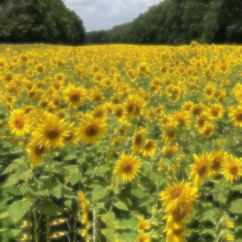

In [97]:
added_image = add_image_list(laplacian_pyramid)

print('Shape of added image = ', added_image.shape)
cv2_imshow(added_image)

In [86]:
import functools as fn
import operator as op

added_image = fn.reduce(op.add, laplacian_pyramid[::-1])
print('Shape of added image = ', added_image.shape)
cv2_imshow(added_image)

ValueError: operands could not be broadcast together with shapes (484,484,3) (242,242,3) 

In [89]:
import itertools as it

resized = it.accumulate(laplacian_pyramid, cv2.resize(dsize = (0, 0), interpolation = cv2.INTER_LINEAR, fx = 2, fy = 2))

for r in resized:
  print(r.shape)

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - resize() missing required argument 'src' (pos 1)
>  - resize() missing required argument 'src' (pos 1)
